<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/Neural_Network_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

Using TensorFlow backend.


In [2]:
cancer = datasets.load_breast_cancer() 
x=pd.DataFrame(cancer.data) 
y=pd.DataFrame(cancer.target) 
x=x.to_numpy() 
y=y.to_numpy() 
x=preprocessing.normalize(x, norm='l2') 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1,shuffle=True) 
print(np.shape(x))


(569, 30)


In [3]:
model = Sequential()
n_cols = train_x.shape[1]

model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            val=0.96
            if(logs.get('acc')>val):
                print("\nReached ",val," accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

In [5]:
history=model.fit(train_x, train_y,validation_split=0.1, epochs=500,callbacks=[], verbose=0)

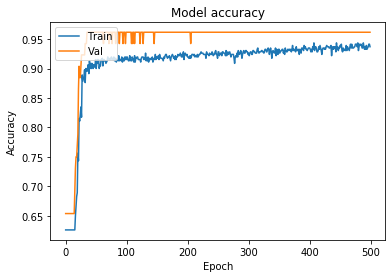

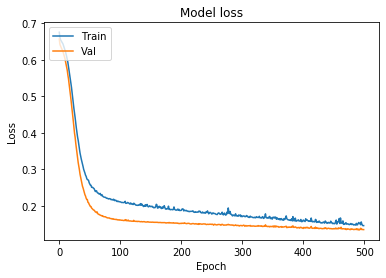

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [7]:
_, accuracy = model.evaluate(test_x, test_y)
print("Test Score= ", accuracy*100)

57/57 [==============================] - 0s 135us/step
Test Score=  92.98245687233774
